In [6]:
!pip install kaggle -q

Importing the **Dependencies**

In [7]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer # Convert text to vectors
from sklearn.metrics.pairwise import cosine_similarity # Compare similarity between song vectors
from wordcloud import WordCloud # For creating word clouds from text data
import re # For text cleaning using regular expressions
import nltk # NLP library for text processing
from nltk.corpus import stopwords # Common stopwords list (e.g., 'the', 'is', 'and')
from nltk.tokenize import word_tokenize # Splits text into words (tokens)

Data Collection

In [8]:
kaggle_config = json.load(open("kaggle.json"))

In [9]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [10]:
# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [11]:
# loadig the dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 857MB/s]


In [12]:
!ls

kaggle.json  sample_data  spotify-million-song-dataset.zip


In [13]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [14]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("/content/spotify_millsongdata.csv")

In [15]:
df.shape

(57650, 4)

In [16]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [18]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [19]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)



Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [20]:
df=df.sample(10000)
df=df.drop('link',axis=1).reset_index(drop=True)

In [21]:
df.shape

(10000, 3)

In [22]:
df.head()

,artist,song,text
0,Eagles,Nightingale,I'm hanging on to my peace of mind \r\nI just...
1,Fastball,Louie Louie,Sittin' here in your room \r\nI've been liste...
2,Jennifer Lopez,Cherry Pie,Well swingin' on the front porch swingin' on t...
3,Dave Matthews Band,Grey Blue Eyes,I fade from the light \r\nYour glory was lost...
4,Paul McCartney,Blue Jean Bop,Bluejean baby \r\n \r\nWith your big blue ey...


In [23]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

WordCloud to visualize the most common words in the lyrics.

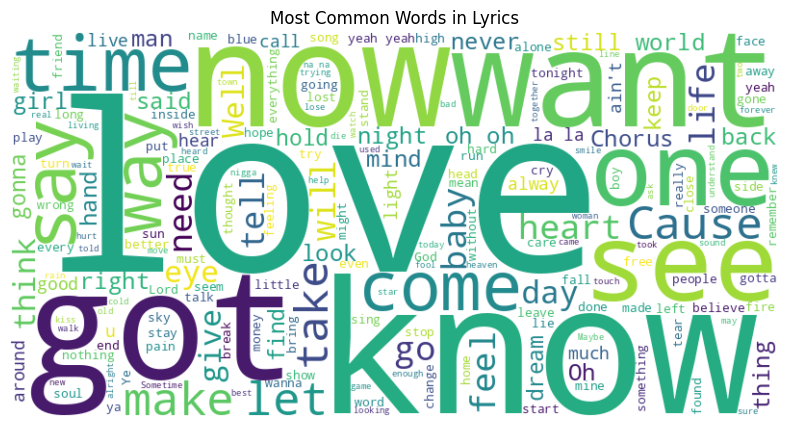

In [24]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

Data Preprocessing

In [25]:
# download nltk data
nltk.download('punkt') # Download tokenizer models for word_tokenize()
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
def preprocess_text(text):
  # Remove special characters and numbers
  text = re.sub(r"[^a-zA-Z\s]","",text)
  # Convert to lowercase
  text = text.lower()
  # Tokenize and remove stopwords
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [28]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [29]:
df.head()

,artist,song,text,cleaned_text
0,Eagles,Nightingale,I'm hanging on to my peace of mind \r\nI just...,im hanging peace mind dont know im hanging goo...
1,Fastball,Louie Louie,Sittin' here in your room \r\nI've been liste...,sittin room ive listen freeway moon shinin bro...
2,Jennifer Lopez,Cherry Pie,Well swingin' on the front porch swingin' on t...,well swingin front porch swingin lawn swingin ...
3,Dave Matthews Band,Grey Blue Eyes,I fade from the light \r\nYour glory was lost...,fade light glory lost night mind cant get righ...
4,Paul McCartney,Blue Jean Bop,Bluejean baby \r\n \r\nWith your big blue ey...,bluejean baby big blue eyes dont want looking ...


In [30]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [31]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [33]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=6):
  # Find the index of the song
  idx = df[df['song'].str.lower() == song_name.lower()].index
  if len(idx) ==0:
    return "Song not found!"
  idx = idx[0]

  # Getting similarity scores
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:top_n+1]

  # Get song indices
  song_indices = [i[0] for i in sim_scores]

  # Return top n similar songs
  return df[['artist', 'song']].iloc[song_indices]


In [34]:
df['song'][2]

'Cherry Pie'

In [35]:
# Example Recommendation
print("\nRecommendations for the song 'Cherry Pie':")
recommendations = recommend_songs("Cherry Pie") # df["song"][2]
print(recommendations)



Recommendations for the song 'Cherry Pie':
             artist                    song
4347  Michael Buble          Peroxide Swing
8397    Bing Crosby  Swingin' Down The Lane
860   Wanda Jackson      Man We Had A Party
557        Iggy Pop         Real Wild Child
773          ZZ Top              Cherry Red
9851           UB40          Cherry Oh Baby
